# Volatility in Real-World Stock Movements

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

In [1]:
#Package Import
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import shapiro
import scipy.stats as stats
sns.set_style('darkgrid')

In [2]:
#Import functions associated with Black-Scholes Equations

%run functions_black_scholes.py


import types

# List all functions in functions_black_scholes.py
function_list = [name for name, obj in globals().items() if isinstance(obj, types.FunctionType)]
print(function_list[1:])


['__nonzero__', 'bs_call', 'bs_put', 'bs_call_delta', 'bs_put_delta', 'bs_gamma', 'bs_vega', 'bs_call_theta', 'bs_put_theta', 'bs_call_rho', 'bs_put_rho', 'bs_MC_call_delta', 'bs_MC_call_delta_array', 'bs_MC_call', 'bs_MC_put_delta', 'bs_MC_put_delta_array', 'bs_MC_put']


### Recall:

Last time, we used Monte-Carlo simulation to understand the distribution of profits of selling call options whose underlying stock follows a Geometric Brownian motion.

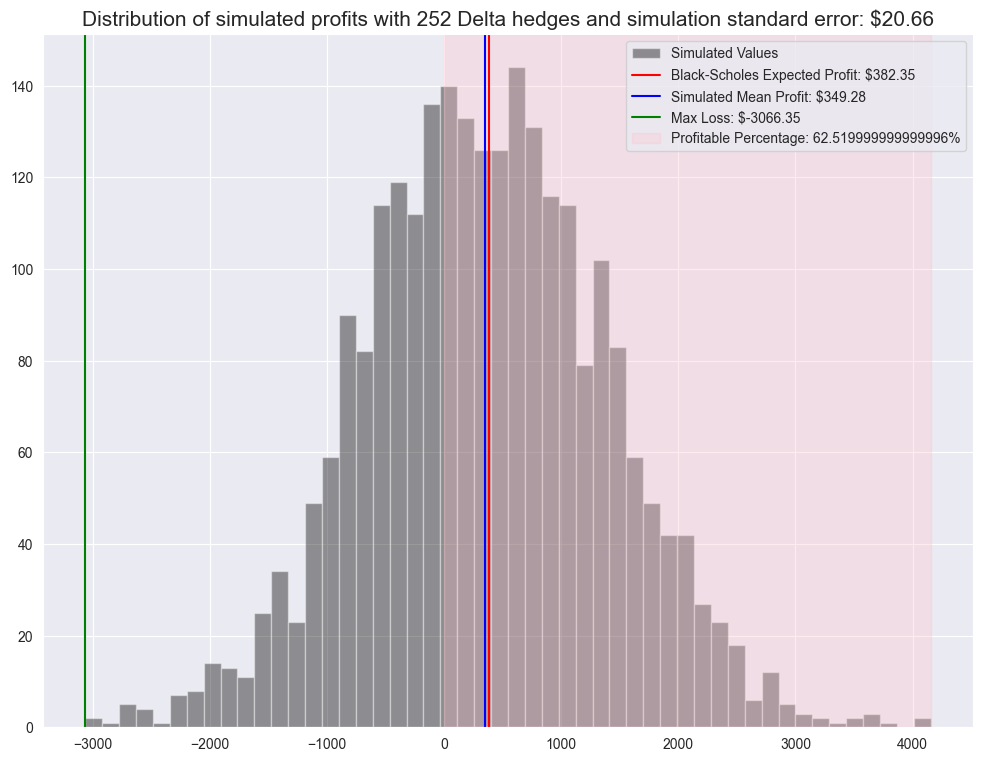

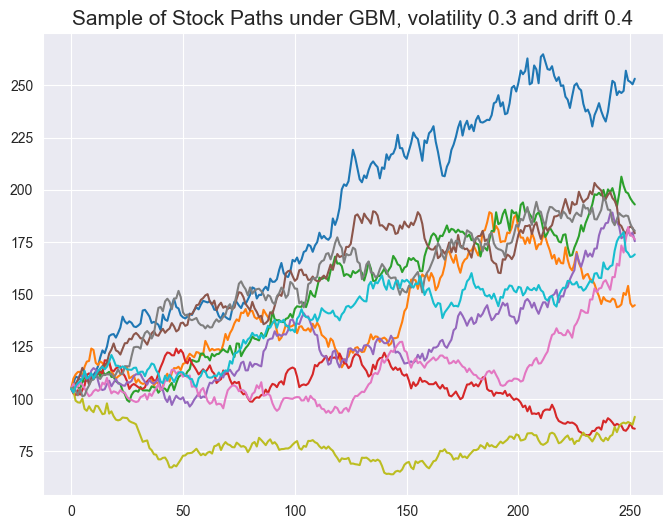

In [3]:
#Simulate and plot histograms of a 
#seller of 1000 call option contracts that receives a premium above the Black-Scholes Price


S0 = 105
K = 100
sigma = .3
t = 1
r = 0.035
mu = .4 #Drift of stock movement
n_sims = 2500
n_hedges = 252


premium = bs_call(S0,K,sigma + .01,t,r) #Increased volatility results in higher price in Black-Scholes model
num_options = 1000



bs_price = bs_call(S0,K,sigma,t,r)



sold_calls_hedged = bs_MC_call(S0, K, sigma, t, r, mu, n_sims, n_hedges)


profits_hedged = num_options*(premium - sold_calls_hedged)





plt.figure(figsize = (12,9))

plt.hist(profits_hedged, bins = 50, alpha = .4, color = 'black', label = 'Simulated Values')

plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')

plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')

plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'green')

plt.axvspan(0,np.max(profits_hedged), color='pink', alpha=0.3,\
label = f'Profitable Percentage: {np.mean(profits_hedged>=0)*100}%')

plt.legend()

plt.title(f'Distribution of simulated profits with {n_hedges} \
Delta hedges and simulation standard error: \${np.std(profits_hedged)/np.sqrt(n_sims):.2f}',size = 15)

plt.show()



### Plot sample stock paths with GBM assumptions



noise = np.random.normal(0,1,(10,n_hedges))

dt = t/n_hedges

increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

log_returns = np.cumsum(increments, axis = 1)

paths = S0*np.exp(log_returns)

paths = np.insert(paths, 0, S0, axis = 1)

plt.figure(figsize = (8,6))

for path in paths:
    plt.plot(path)
    
plt.title(f'Sample of Stock Paths under GBM, volatility {sigma} and drift {mu}', size = 15)

plt.show()

### Important Take Away:

The process of regularly heding removes the influence of drift in a stock from the distribution of profits of selling an option and regularly hedging.

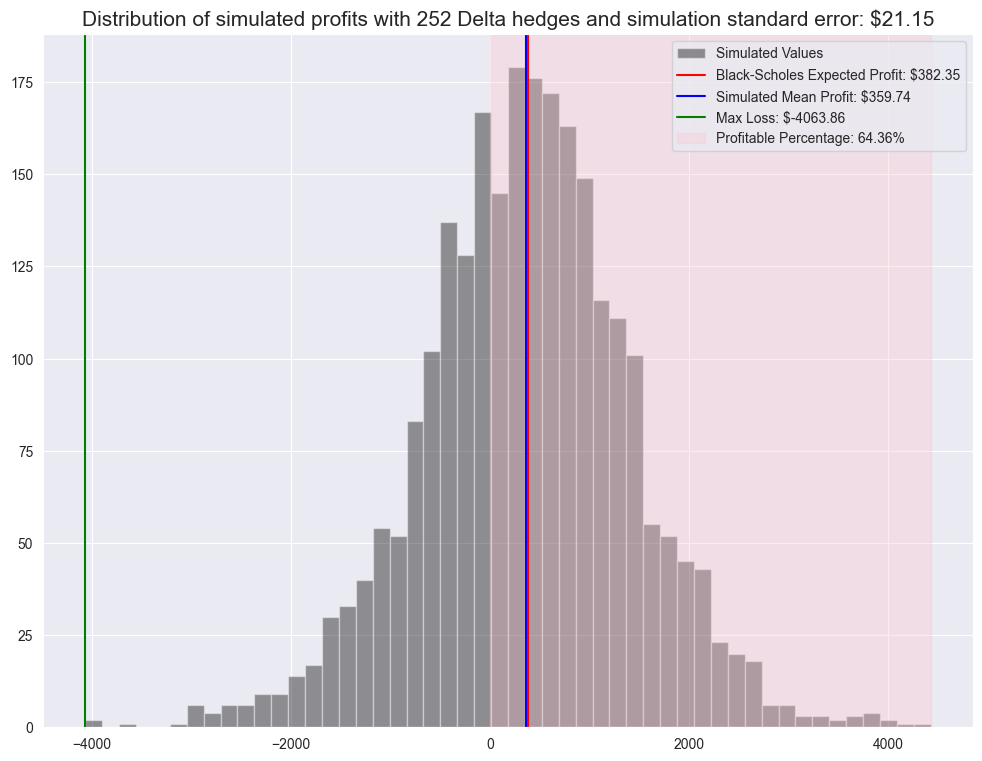

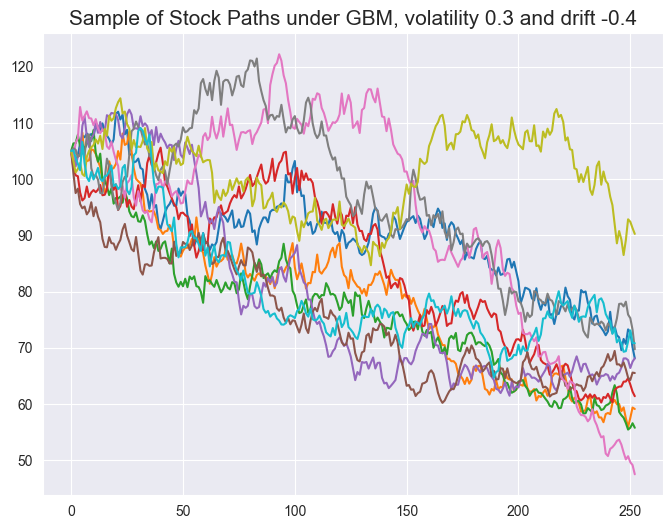

In [4]:
### Repeat simulation above but with different drift term in stock model

#Simulate and plot histograms of a 
#seller of 1000 call option contracts that receives a premium above the Black-Scholes Price


S0 = 105
K = 100
sigma = .3
t = 1
r = 0.035
mu = -.4 #Drift of stock movement
n_sims = 2500
n_hedges = 252


premium = bs_call(S0,K,sigma + .01,t,r) #Increased volatility results in higher price in Black-Scholes model
num_options = 1000



bs_price = bs_call(S0,K,sigma,t,r)



sold_calls_hedged = bs_MC_call(S0, K, sigma, t, r, mu, n_sims, n_hedges)


profits_hedged = num_options*(premium - sold_calls_hedged)





plt.figure(figsize = (12,9))

plt.hist(profits_hedged, bins = 50, alpha = .4, color = 'black', label = 'Simulated Values')

plt.axvline(num_options*(premium-bs_price), label = f'Black-Scholes Expected Profit: ${num_options*(premium-bs_price):.2f}', color = 'red')

plt.axvline(np.mean(profits_hedged), label = f'Simulated Mean Profit: ${np.mean(profits_hedged):.2f}', color = 'blue')

plt.axvline(np.min(profits_hedged), label = f'Max Loss: ${np.min(profits_hedged):.2f}', color = 'green')

plt.axvspan(0,np.max(profits_hedged), color='pink', alpha=0.3,\
label = f'Profitable Percentage: {np.mean(profits_hedged>=0)*100}%')

plt.legend()

plt.title(f'Distribution of simulated profits with {n_hedges} \
Delta hedges and simulation standard error: \${np.std(profits_hedged)/np.sqrt(n_sims):.2f}',size = 15)

plt.show()



### Plot sample stock paths with GBM assumptions



noise = np.random.normal(0,1,(10,n_hedges))

dt = t/n_hedges

increments = (mu + r - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

log_returns = np.cumsum(increments, axis = 1)

paths = S0*np.exp(log_returns)

paths = np.insert(paths, 0, S0, axis = 1)

plt.figure(figsize = (8,6))

for path in paths:
    plt.plot(path)
    
plt.title(f'Sample of Stock Paths under GBM, volatility {sigma} and drift {mu}', size = 15)

plt.show()

### Capital needed for Delta Hedging

Regularly hedging a sold call option that expires in-the-money will have the trader regularly buying (and selling) the underlying stock until maturity until the trader ends up with exactly one share of stock per option sold. Option contracts are sold in multiples of 100. To avoid large fees associated with borrowing stock, the trader will want to keep capital available to purchase underlying stock throughout the hedging process.

We can keep track of shares of stocks purchased in a simulated environment to understand a distribution of how much capital is needed in the hedging process.

### Assumptions of the Black-Scholes Model and Measuring Sigma

The Black-Scholes model assumes that a stock’s price follows a continuous-time stochastic process, i.e., the limit of discrete random walks, resulting in a continuous model whose log-returns are normally distributed with constant volatility.

While these assumptions do not fully capture the complexities of real-world market behavior, they often provide a reasonable approximation. In practice, the model performs surprisingly well in many settings. To better understand its limitations and strengths, we can examine real market data.

[*********************100%***********************]  1 of 1 completed


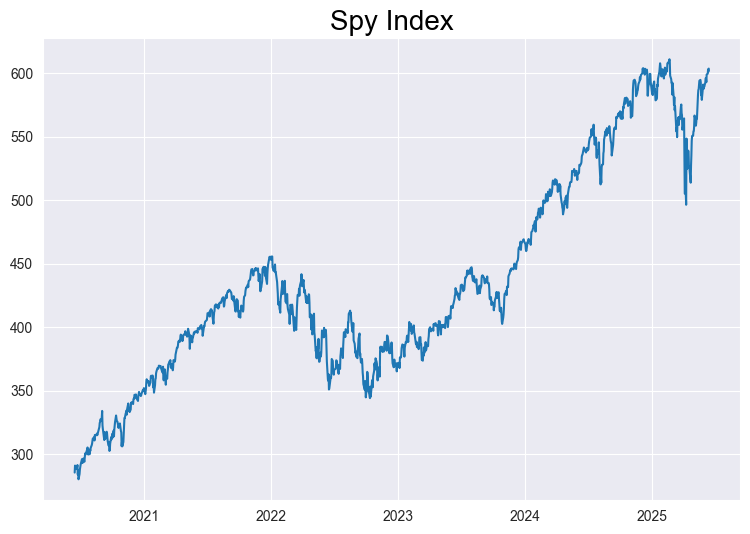

In [6]:
#SPY data
spy_index = yf.download('SPY', period = '5y', interval = '1d')

plt.figure(figsize = (9,6))
plt.plot(spy_index['Close'])
plt.title('Spy Index', size = 20, color = 'black')
plt.show()

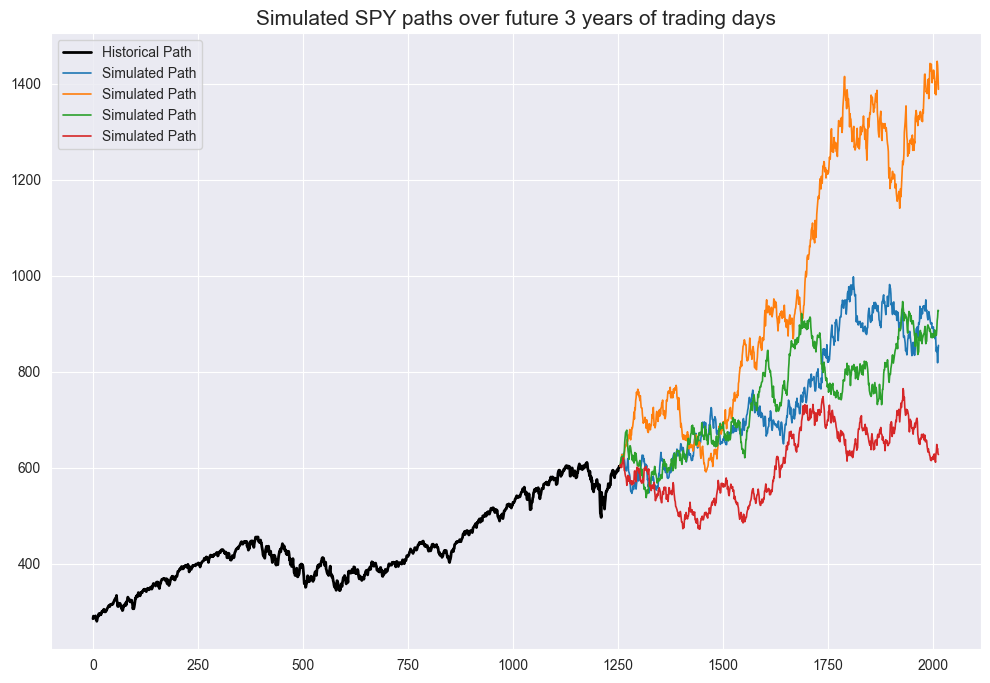

In [56]:
### Graphical representation of modeling SPY index stock

spy_volatility = (np.log(spy_index['Close']/spy_index['Close'].shift(1)).std()*np.sqrt(252)).iloc[0]

spy_log_drift = (np.log(spy_index['Close']/spy_index['Close'].shift(1)).mean()*252).iloc[0]

S0 = spy_index['Close'].iloc[-1].iloc[-1]

mu = spy_log_drift

sigma = spy_volatility


n_paths = 4
n_days = 3*252 ## 3 years

dt = 3/(2*252)


noise = np.random.normal(0,1,[n_paths, n_days])

increments = (mu - .5*sigma**2)*dt + sigma*np.sqrt(dt)*noise

log_returns = np.cumsum(increments, axis = 1)

paths = S0*np.exp(log_returns)


paths = np.insert(paths, 0 , S0, axis = 1)

spy_history = spy_index['Close'].values

X = np.linspace(len(spy_history)-1, len(spy_history) + n_days +1, n_days + 1)

plt.figure(figsize = (12,8))

plt.title(f'Simulated SPY paths over future 3 years of trading days', size = 15)

plt.plot(spy_history, label = 'Historical Path', lw = 2, color = 'black')


for path in paths:
    plt.plot(X, path, lw = 1.2, label = 'Simulated Path')
    
plt.legend()
plt.show()

### Measuring sigma:

In the above, we measured $\sigma$, the yearly volatility of SPY index, as a normalized standard deviation of the log returns of the last 5 years of trading dates. Let's examine values for sigma measured over different time intervals.

The first way we will do this is by finding volatility over each month of trading days in the historical data.

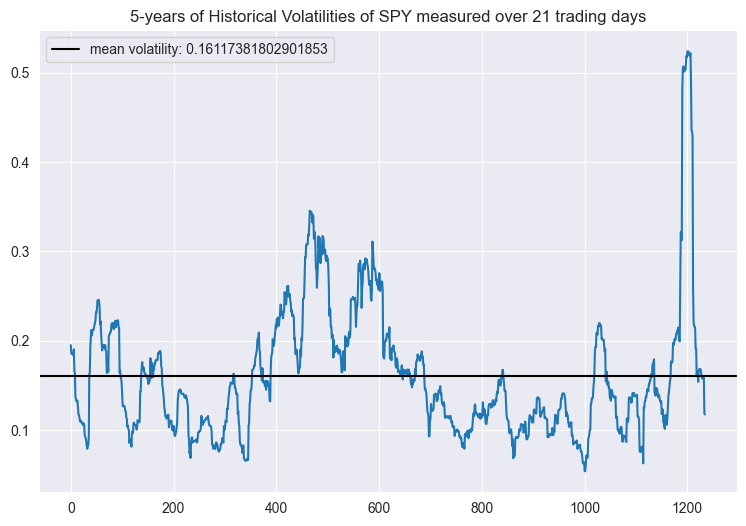

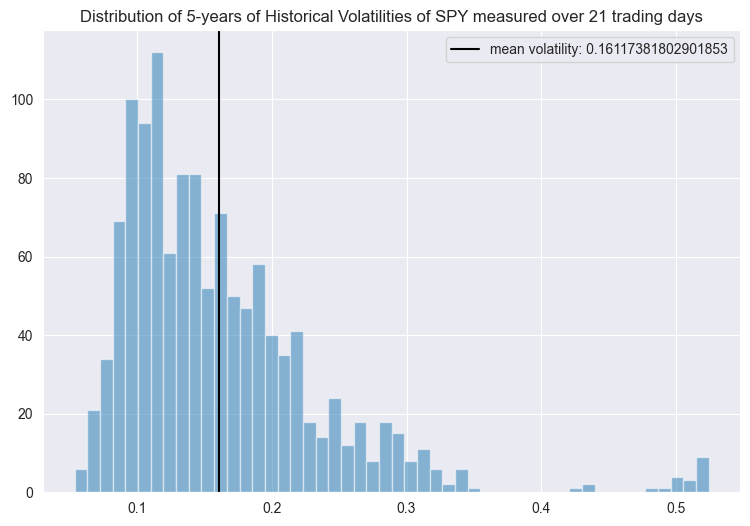

In [58]:
#Organize historical volatilities of SPY index over historical 21 daily log-returns
spy_rolling_vols = (np.log(spy_index['Close']/spy_index['Close'].shift(1)).rolling(window = 21).std()*np.sqrt(252)).values
spy_rolling_vols = spy_rolling_vols[21:]



## Visuals of historical volatility measurements
plt.figure(figsize = (9,6))

plt.title('5-years of Historical Volatilities of SPY measured over 21 trading days')

plt.plot(spy_rolling_vols)
plt.axhline(np.mean(spy_rolling_vols), color = 'black', label = f'mean volatility: {np.mean(spy_rolling_vols)}')


plt.legend()
plt.show()



plt.figure(figsize = (9,6))

plt.title('Distribution of 5-years of Historical Volatilities of SPY measured over 21 trading days')

plt.hist(spy_rolling_vols, bins = 50, alpha = .5)
plt.axvline(np.mean(spy_rolling_vols), color = 'black', label = f'mean volatility: {np.mean(spy_rolling_vols)}')


plt.legend()
plt.show()

### Volatility measured over smaller increments of time

Volatility measurements also tend to show similar trends on a smaller scale.

In [49]:
#Gather minute data of SPY
spy_index_minute = yf.download('SPY', period = '5d', interval = '1m')

spy_log_minute_returns = np.log(spy_index_minute['Close']/spy_index_minute['Close'].shift(1))

print(f'Volatility of SPY index measured over one-minute returns from last 5 days: \
{(spy_log_minute_returns.std()*np.sqrt(60*24*252)).iloc[0]}')

[*********************100%***********************]  1 of 1 completed

Volatility of SPY index measured over one-minute returns from last 5 days: 0.15942331855329497


In [50]:
len(spy_log_minute_returns)

1907

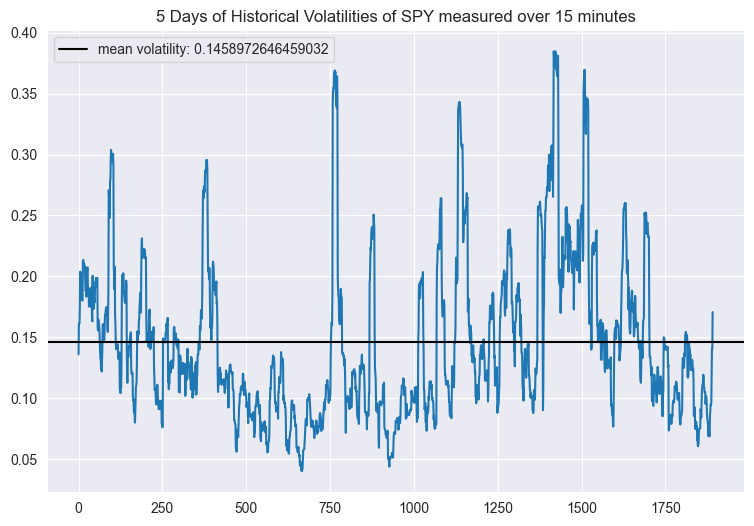

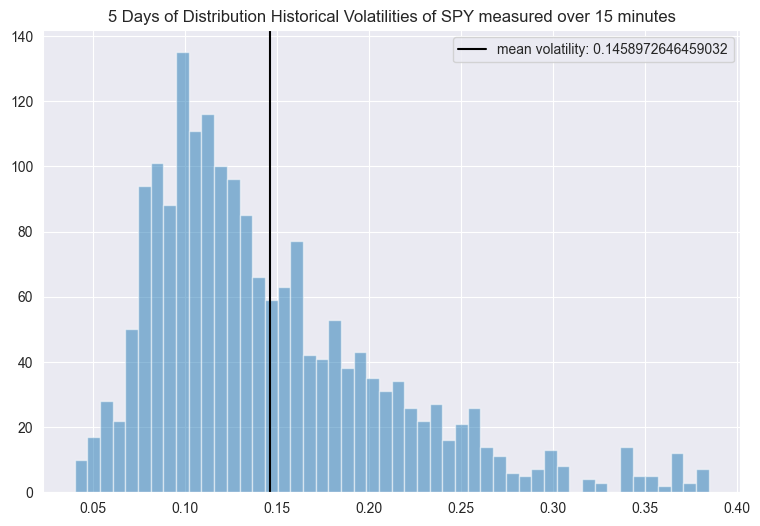

In [55]:
##Organize historical volatilities of SPY index over historical 15-minute intervals
spy_rolling_vols_minute\
= (np.log(spy_index_minute['Close']/spy_index_minute['Close'].shift(1)).rolling(window = 15)\
.std()*np.sqrt(252*60*24)).values
spy_rolling_vols_minute = spy_rolling_vols_minute[15:]


## Visuals of historical volatility measurements over 60 minute windows
## Visuals of historical volatility measurements
plt.figure(figsize = (9,6))

plt.title('5 Days of Historical Volatilities of SPY measured over 15 minutes')

plt.plot(spy_rolling_vols_minute)
plt.axhline(np.mean(spy_rolling_vols_minute), color = 'black', label = f'mean volatility: {np.mean(spy_rolling_vols_minute)}')


plt.legend()
plt.show()



plt.figure(figsize = (9,6))

plt.title('5 Days of Distribution Historical Volatilities of SPY measured over 15 minutes')

plt.hist(spy_rolling_vols_minute, bins = 50, alpha = .5)
plt.axvline(np.mean(spy_rolling_vols_minute), color = 'black', label = f'mean volatility: {np.mean(spy_rolling_vols_minute)}')


plt.legend()
plt.show()


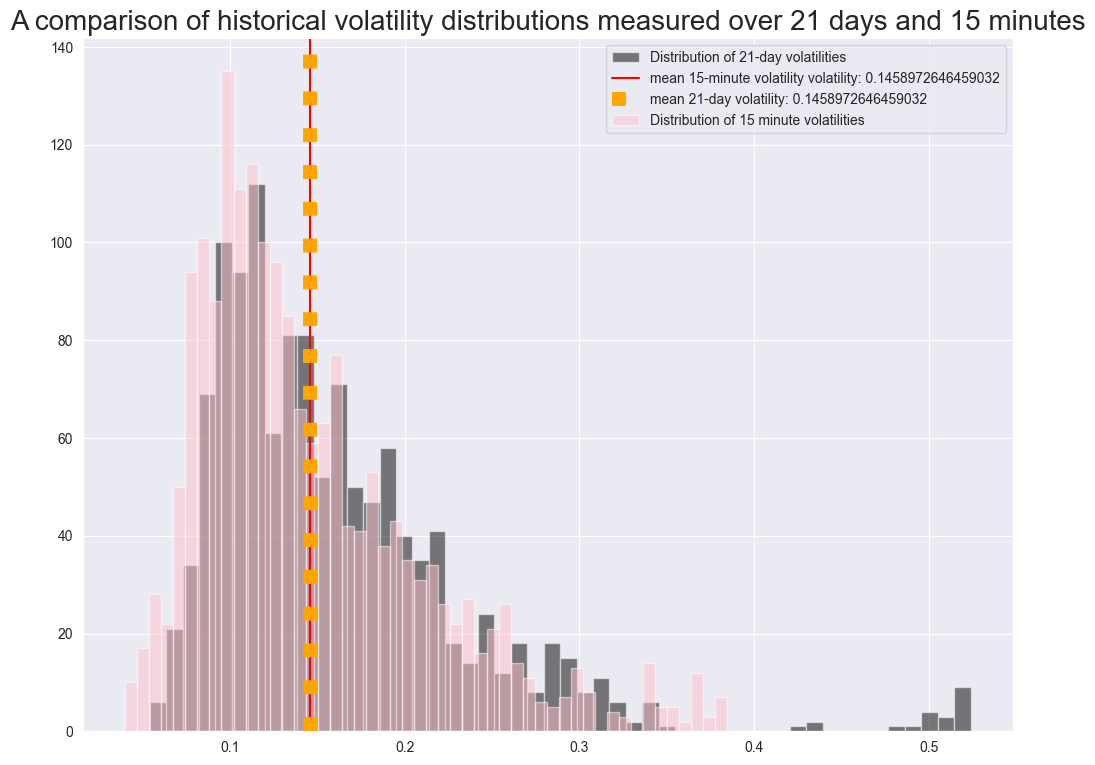

In [80]:
### Give a comparison of the distributions of historical volatilites measured over 21 days compared to 15 minutes


plt.figure(figsize = (12,9))

plt.title(f'A comparison of historical volatility distributions measured over 21 days and 15 minutes', size =20)

plt.hist(spy_rolling_vols, bins = 50, alpha = .5, color = 'black', label = 'Distribution of 21-day volatilities')
plt.axvline(np.mean(spy_rolling_vols_minute), color = 'red', label = f'mean 15-minute volatility volatility: {np.mean(spy_rolling_vols_minute)}')

plt.axvline(np.mean(spy_rolling_vols_minute),ls = ':', lw = 10, alpha = 1, color = 'orange', label = f'mean 21-day volatility: {np.mean(spy_rolling_vols_minute)}')

plt.hist(spy_rolling_vols_minute, bins = 50, alpha = .5, color = 'pink',label = 'Distribution of 15 minute volatilities')

plt.legend()


plt.show()